In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define working directory
os.chdir('C:\\Users\\BROTHERS\\Desktop\\Data science project\\cars eda')

In [3]:
cars = pd.read_csv('Cars_sales.csv')

In [4]:
cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,Engine Size(L),Cylinders,Horsepower,MPG (City),MPG (Highway),Weight (LBS),Wheelbase(IN),Length (IN)
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Make            428 non-null    object 
 1   Model           428 non-null    object 
 2   Type            428 non-null    object 
 3   Origin          428 non-null    object 
 4   DriveTrain      428 non-null    object 
 5   MSRP            428 non-null    object 
 6   Invoice         428 non-null    object 
 7   Engine Size(L)  428 non-null    float64
 8   Cylinders       428 non-null    object 
 9   Horsepower      428 non-null    int64  
 10  MPG (City)      428 non-null    int64  
 11  MPG (Highway)   428 non-null    int64  
 12  Weight (LBS)    428 non-null    int64  
 13  Wheelbase(IN)   428 non-null    int64  
 14  Length (IN)     428 non-null    int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 50.3+ KB


In [6]:
col_drop=['MSRP','Invoice']
cars=cars.drop(col_drop, axis=1)

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Make            428 non-null    object 
 1   Model           428 non-null    object 
 2   Type            428 non-null    object 
 3   Origin          428 non-null    object 
 4   DriveTrain      428 non-null    object 
 5   Engine Size(L)  428 non-null    float64
 6   Cylinders       428 non-null    object 
 7   Horsepower      428 non-null    int64  
 8   MPG (City)      428 non-null    int64  
 9   MPG (Highway)   428 non-null    int64  
 10  Weight (LBS)    428 non-null    int64  
 11  Wheelbase(IN)   428 non-null    int64  
 12  Length (IN)     428 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 43.6+ KB


In [8]:
cars=cars.drop_duplicates(keep='first')

In [9]:
cars.shape # means no duplicates in the data

(428, 13)

In [10]:
cars.describe()

,Engine Size(L),Horsepower,MPG (City),MPG (Highway),Weight (LBS),Wheelbase(IN),Length (IN)
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [11]:
cars_sort=cars.sort_values(by='MPG (City)', ascending=False)
cars_sort.head()

,Make,Model,Type,Origin,DriveTrain,Engine Size(L),Cylinders,Horsepower,MPG (City),MPG (Highway),Weight (LBS),Wheelbase(IN),Length (IN)
150,Honda,Insight 2dr (gas/electric),Hybrid,Asia,Front,2.0,3,73,60,66,1850,95,155
373,Toyota,Prius 4dr (gas/electric),Hybrid,Asia,Front,1.5,4,110,59,51,2890,106,175
149,Honda,Civic Hybrid 4dr manual (gas/electric),Hybrid,Asia,Front,1.4,4,93,46,51,2732,103,175
404,Volkswagen,Jetta GLS TDI 4dr,Sedan,Europe,Front,1.9,4,100,38,46,3003,99,172
155,Honda,Civic HX 2dr,Sedan,Asia,Front,1.7,4,117,36,44,2500,103,175


In [12]:
def min_max_values(col):
    top=cars[col].idxmax()
    top_obs=pd.DataFrame(cars.loc[top])
    bottom=cars[col].idxmin()
    bot_obs=pd.DataFrame(cars.loc[bottom])
    min_max_obs=pd.concat([top_obs, bot_obs], axis=1)
    return min_max_obs

In [13]:
min_max_values('Horsepower')

,114,150
Make,Dodge,Honda
Model,Viper SRT-10 convertible 2dr,Insight 2dr (gas/electric)
Type,Sports,Hybrid
Origin,USA,Asia
DriveTrain,Rear,Front
Engine Size(L),8.3,2
Cylinders,10,3
Horsepower,500,73
MPG (City),12,60
MPG (Highway),20,66


(array([ 31., 195., 142.,  44.,   9.,   4.,   0.,   1.,   0.,   2.]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.]),
 <a list of 10 Patch objects>)

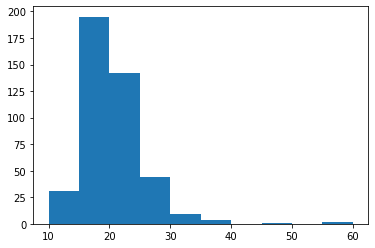

In [18]:
num_bins=10
plt.hist(cars['MPG (City)'],num_bins)

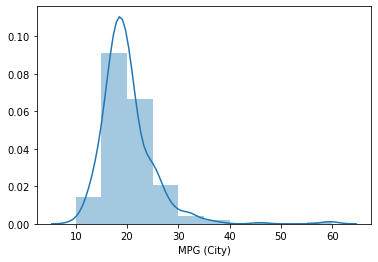

In [19]:
sns.distplot(cars['MPG (City)'],num_bins)

In [21]:
make_dist=cars.groupby('Make').size()
make_dist

Make
Acura             7
Audi             19
BMW              20
Buick             9
Cadillac          8
Chevrolet        27
Chrysler         15
Dodge            13
Ford             23
GMC               8
Honda            17
Hummer            1
Hyundai          12
Infiniti          8
Isuzu             2
Jaguar           12
Jeep              3
Kia              11
Land Rover        3
Lexus            11
Lincoln           9
MINI              2
Mazda            11
Mercedes-Benz    26
Mercury           9
Mitsubishi       13
Nissan           17
Oldsmobile        3
Pontiac          11
Porsche           7
Saab              7
Saturn            8
Scion             2
Subaru           11
Suzuki            8
Toyota           28
Volkswagen       15
Volvo            12
dtype: int64

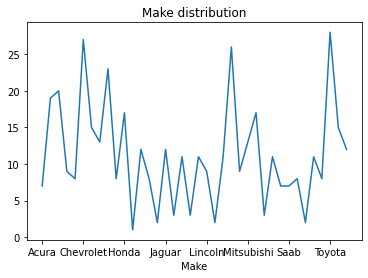

In [28]:
make_dist.plot(title='Make distribution')

In [29]:
cars_num=cars.select_dtypes(include=['float64','int64'])

In [31]:
cars_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 427
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Engine Size(L)  428 non-null    float64
 1   Horsepower      428 non-null    int64  
 2   MPG (City)      428 non-null    int64  
 3   MPG (Highway)   428 non-null    int64  
 4   Weight (LBS)    428 non-null    int64  
 5   Wheelbase(IN)   428 non-null    int64  
 6   Length (IN)     428 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 46.8 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000173C9DBA048>,
      dtype=object)

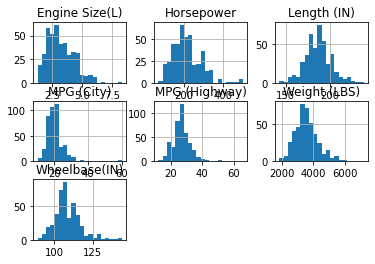

In [33]:
cars_num.hist(bins=20)

In [34]:
# correlation with the variable of interest
cars_corr=cars_num.corr()['MPG (City)'][:-1]

In [35]:
cars_corr

Engine Size(L)   -0.709471
Horsepower       -0.676699
MPG (City)        1.000000
MPG (Highway)     0.941021
Weight (LBS)     -0.737966
Wheelbase(IN)    -0.507284
Name: MPG (City), dtype: float64

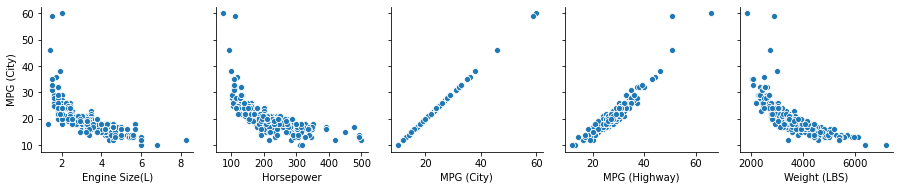

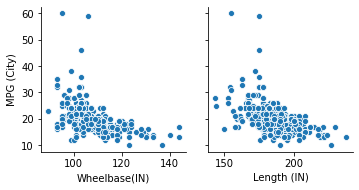

In [37]:
# correlationk with the help of pairplot 
for i in range(0, len(cars_num.columns),5):
    sns.pairplot(cars_num, y_vars=['MPG (City)'],x_vars=cars_num.columns[i:i+5])
    # almost everthing is negatively correlated with MPG

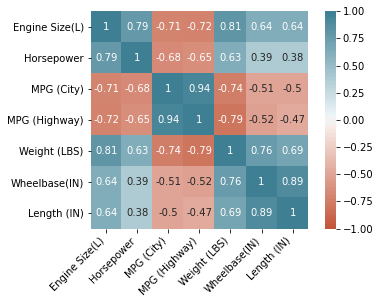

In [41]:
# correlation with the help of heatmap
corr = cars_num.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

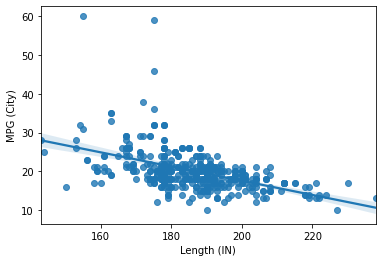

In [43]:
sns.regplot(cars['Length (IN)'],cars['MPG (City)'])

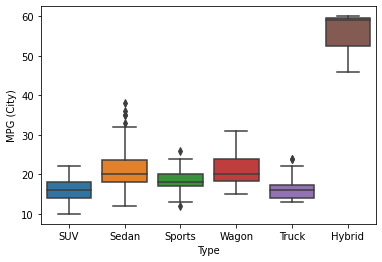

In [55]:
sns.boxplot(data=cars,y='MPG (City)',x='Type')


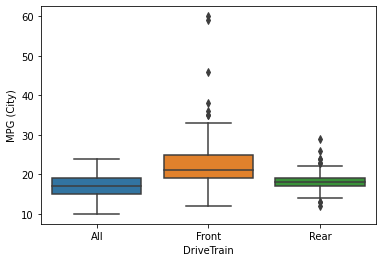

In [56]:
sns.boxplot(data=cars,y='MPG (City)',x='DriveTrain')

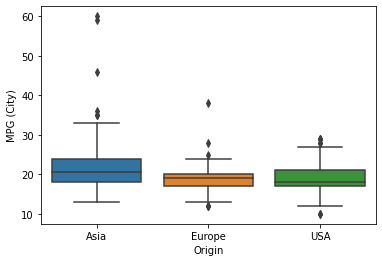

In [57]:
sns.boxplot(data=cars,y='MPG (City)',x='Origin')

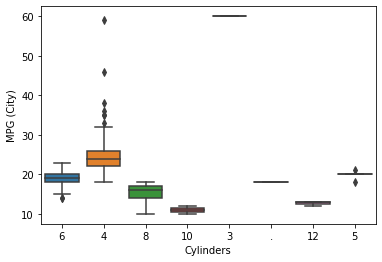

In [58]:
sns.boxplot(data=cars,y='MPG (City)',x='Cylinders')